In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv(r"C:\Users\ASUS\Desktop\ml A6 project\House Price India.csv") 
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [7]:
print(df.isnull().sum())  # Check missing values
df.fillna(df.median(), inplace=True)  # Handle missing values
df = pd.get_dummies(df, drop_first=True)  # Convert categorical features (if any)
print(df.describe())  # Show dataset summary


id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [8]:
X = df.drop("Price", axis=1)  # Independent variables
y = df["Price"]  # Dependent variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr_model = LinearRegression()  # Create model
lr_model.fit(X_train, y_train)  # Train model
y_pred_lr = lr_model.predict(X_test)  # Predict prices

In [11]:
dt_model = DecisionTreeRegressor()  # Create model
dt_model.fit(X_train, y_train)  # Train model
y_pred_dt = dt_model.predict(X_test)  # Predict prices

In [12]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")



Model: Linear Regression
Mean Absolute Error (MAE): 103255.14120745365
Mean Squared Error (MSE): 38568291246.59178
R2 Score: 0.7393965202443518

Model: Decision Tree Regression
Mean Absolute Error (MAE): 20424.72777017784
Mean Squared Error (MSE): 8815117519.918604
R2 Score: 0.9404368141316405


In [20]:
# Step 1: Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],  # Control tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5],  # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Features to consider at each split
}

# Step 3: Initialize DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Step 4: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Fit on training data (X_train, y_train)
grid_search.fit(X_train, y_train)

# Step 5: Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 6: Train Decision Tree with best parameters
best_dt = DecisionTreeRegressor(**best_params, random_state=42)
best_dt.fit(X_train, y_train)

# Step 7: Evaluate the optimized model
y_pred = best_dt.predict(X_test)

print("\nOptimized Decision Tree Regression Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Optimized Decision Tree Regression Results:
Mean Absolute Error (MAE): 22493.426860191015
Mean Squared Error (MSE): 5378345405.349115
R2 Score: 0.9636588637282281


c:\Users\ASUS\Desktop\ml A6 project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
79 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ASUS\Desktop\ml A6 project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ASUS\Desktop\ml A6 project\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\ASUS\Desktop\ml A6 project\.venv\

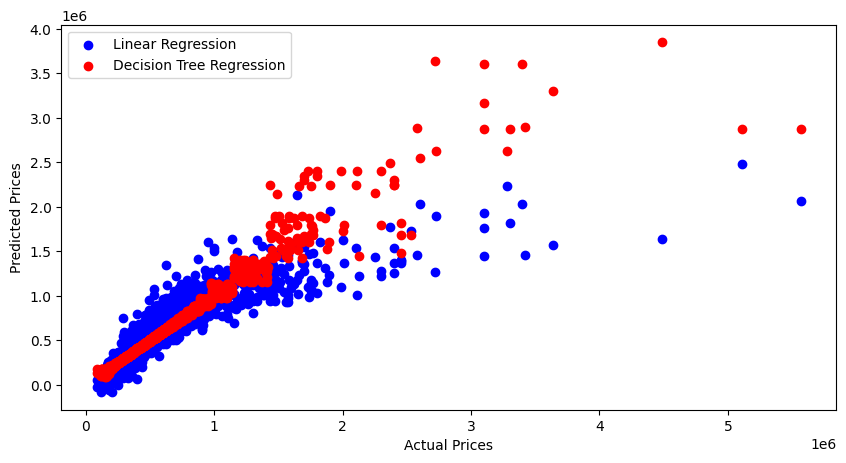

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, color='blue', label="Linear Regression")
plt.scatter(y_test, y_pred_dt, color='red', label="Decision Tree Regression")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.show()

In [22]:
import joblib
joblib.dump(lr_model, "linear_regression.pkl")
joblib.dump(dt_model, "decision_tree.pkl")

['decision_tree.pkl']

In [24]:
lr_model = joblib.load("linear_regression.pkl")
dt_model = joblib.load("decision_tree.pkl")
